In [ ]:
e!pip install statsmodels

In [ ]:
# haversine (직선거리 구하는 패키지) 설치
!pip install haversine

In [ ]:
!pip install geopandas

     |████████████████████████████████| 972kB 2.8MB/s 
     |████████████████████████████████| 14.8MB 308kB/s 
     |████████████████████████████████| 10.9MB 47.5MB/s 


In [ ]:
import numpy as np
import pandas as pd
import plotly.offline as pyo
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
import re
import geopandas as gpd
from haversine import haversine

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
loc_inf=pd.read_csv('/content/drive/My Drive/data/whole.csv',index_col=0)
age_inf=pd.read_csv('/content/drive/My Drive/BigCon_BiKong/외부데이터/연령별 지역별 감염병 데이터/total.csv',index_col=0)

In [ ]:
afr_inf=pd.read_csv('/content/drive/My Drive/BigCon_BiKong/외부데이터/해외감염병/합친 감염병 데이터/AFR_df.csv')
amr_inf=pd.read_csv('/content/drive/My Drive/BigCon_BiKong/외부데이터/해외감염병/합친 감염병 데이터/AMR_df.csv')
emr_inf=pd.read_csv('/content/drive/My Drive/BigCon_BiKong/외부데이터/해외감염병/합친 감염병 데이터/EMR_df.csv')
eur_inf=pd.read_csv('/content/drive/My Drive/BigCon_BiKong/외부데이터/해외감염병/합친 감염병 데이터/EUR_df.csv')
sear_inf=pd.read_csv('/content/drive/My Drive/BigCon_BiKong/외부데이터/해외감염병/합친 감염병 데이터/SEAR_df.csv')
wpr_inf=pd.read_csv('/content/drive/My Drive/BigCon_BiKong/외부데이터/해외감염병/합친 감염병 데이터/WPR_df.csv')

In [ ]:
loc_inf=loc_inf[['날짜','시구분', '구구분', '에볼라바이러스병', '마버그열', '라싸열', '크리미안콩고출혈열', '남아메리카출혈열',
       '리프트밸리열', '두창', '페스트', '탄저', '보툴리눔독소증', '야토병', '신종감염병증후군',
       '중증급성호흡기증후군(SARS)', '중동호흡기증후군(MERS)', '동물인플루엔자 인체감염증', '신종인플루엔자',
       '디프테리아', '수두', '홍역', '콜레라', '장티푸스', '파라티푸스', '세균성이질', '장출혈성대장균감염증',
       'A형간염', '백일해', '유행성이하선염', '풍진(2018년이전)', '풍진(선천성)', '풍진(후천성)', '폴리오',
       '수막구균 감염증', 'b형헤모필루스인플루엔자', '폐렴구균 감염증', '한센병', '성홍열',
       '반코마이신내성황색포도알균(VRSA) 감염증', '카바페넴내성장내세균속균종(CRE) 감염증', 'E형간염', '파상풍',
       'B형간염', '일본뇌염', 'C형간염', '말라리아', '레지오넬라증', '비브리오패혈증', '발진티푸스', '발진열',
       '쯔쯔가무시증', '렙토스피라증', '브루셀라증', '공수병', '신증후군출혈열',
       '크로이츠펠트-야콥병(CJD) 및 변종크로이츠펠트-야콥병(vCJD)', '황열', '뎅기열', '큐열', '웨스트나일열',
       '라임병', '진드기매개뇌염', '유비저', '치쿤구니야열', '중증열성혈소판감소증후군(SFTS)', '지카바이러스감염증']]

In [ ]:
age_drop=age_inf.drop_duplicates()
age_drop.columns=age_drop.iloc[0,:]
age_drop=age_drop[1:].reset_index(drop=True)
age_drop['시도명칭']=age_drop['지역'].apply(lambda x :x[:2])
age_drop['시작일']=age_drop['기간'].apply(lambda x : re.findall(pattern='[0-9]+\-[0-9]+\-[0-9]+',string=x)[0])
age_drop['종료일']=age_drop['기간'].apply(lambda x : re.findall(pattern='[0-9]+\-[0-9]+\-[0-9]+',string=x)[1])

In [ ]:
age_final=age_drop[['시작일', '종료일','시도명칭','구분', '에볼라바이러스병', '마버그열', '라싸열', '크리미안콩고출혈열', '남아메리카출혈열',
       '리프트밸리열', '두창', '페스트', '탄저', '보툴리눔독소증', '야토병', '신종감염병증후군',
       '중증급성호흡기증후군(SARS)', '중동호흡기증후군(MERS)', '동물인플루엔자 인체감염증', '신종인플루엔자',
       '디프테리아', '수두', '홍역', '콜레라', '장티푸스', '파라티푸스', '세균성이질', '장출혈성대장균감염증',
       'A형간염', '백일해', '유행성이하선염', '풍진(2018년이전)', '풍진(선천성)', '풍진(후천성)', '폴리오',
       '수막구균 감염증', 'b형헤모필루스인플루엔자', '폐렴구균 감염증', '한센병', '성홍열',
       '반코마이신내성황색포도알균(VRSA) 감염증', '카바페넴내성장내세균속균종(CRE) 감염증', 'E형간염', '파상풍',
       'B형간염', '일본뇌염', 'C형간염', '말라리아', '레지오넬라증', '비브리오패혈증', '발진티푸스', '발진열',
       '쯔쯔가무시증', '렙토스피라증', '브루셀라증', '공수병', '신증후군출혈열',
       '크로이츠펠트-야콥병(CJD) 및 변종크로이츠펠트-야콥병(vCJD)', '황열', '뎅기열', '큐열', '웨스트나일열',
       '라임병', '진드기매개뇌염', '유비저', '치쿤구니야열']]

In [ ]:
loc_inf

,날짜,시구분,구구분,에볼라바이러스병,마버그열,라싸열,크리미안콩고출혈열,남아메리카출혈열,리프트밸리열,두창,페스트,탄저,보툴리눔독소증,야토병,신종감염병증후군,중증급성호흡기증후군(SARS),중동호흡기증후군(MERS),동물인플루엔자 인체감염증,신종인플루엔자,디프테리아,수두,홍역,콜레라,장티푸스,파라티푸스,세균성이질,장출혈성대장균감염증,A형간염,백일해,유행성이하선염,풍진(2018년이전),풍진(선천성),풍진(후천성),폴리오,수막구균 감염증,b형헤모필루스인플루엔자,폐렴구균 감염증,한센병,성홍열,반코마이신내성황색포도알균(VRSA) 감염증,카바페넴내성장내세균속균종(CRE) 감염증,E형간염,파상풍,B형간염,일본뇌염,C형간염,말라리아,레지오넬라증,비브리오패혈증,발진티푸스,발진열,쯔쯔가무시증,렙토스피라증,브루셀라증,공수병,신증후군출혈열,크로이츠펠트-야콥병(CJD) 및 변종크로이츠펠트-야콥병(vCJD),황열,뎅기열,큐열,웨스트나일열,라임병,진드기매개뇌염,유비저,치쿤구니야열,중증열성혈소판감소증후군(SFTS),지카바이러스감염증
0,201001,전국,전국,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1138,0,0,14,5,14,0,0,3,256,3,0,0,0,2,0,0,0,3,0,0,0,0,0,0,0,1,3,0,0,1,23,1,2,0,16,0,0,9,5,0,0,0,0,0,0,0
1,201001,서울,서울,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,112,0,0,1,2,2,0,0,0,31,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0
2,201001,서울,강남구,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,201001,서울,강동구,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,201001,서울,강북구,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,202007,제주,제주시,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37,0,0,0,1,0,1,2,0,20,0,0,0,0,0,0,0,0,5,0,19,0,0,0,0,11,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
286,202007,제주,남제주군,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
287,202007,제주,북제주군,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
288,202007,세종,세종,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,0,0,0,2,0,6,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
age_final

,시작일,종료일,시도명칭,구분,에볼라바이러스병,마버그열,라싸열,크리미안콩고출혈열,남아메리카출혈열,리프트밸리열,두창,페스트,탄저,보툴리눔독소증,야토병,신종감염병증후군,중증급성호흡기증후군(SARS),중동호흡기증후군(MERS),동물인플루엔자 인체감염증,신종인플루엔자,디프테리아,수두,홍역,콜레라,장티푸스,파라티푸스,세균성이질,장출혈성대장균감염증,A형간염,백일해,유행성이하선염,풍진(2018년이전),풍진(선천성),풍진(후천성),폴리오,수막구균 감염증,b형헤모필루스인플루엔자,폐렴구균 감염증,한센병,성홍열,반코마이신내성황색포도알균(VRSA) 감염증,카바페넴내성장내세균속균종(CRE) 감염증,E형간염,파상풍,B형간염,일본뇌염,C형간염,말라리아,레지오넬라증,비브리오패혈증,발진티푸스,발진열,쯔쯔가무시증,렙토스피라증,브루셀라증,공수병,신증후군출혈열,크로이츠펠트-야콥병(CJD) 및 변종크로이츠펠트-야콥병(vCJD),황열,뎅기열,큐열,웨스트나일열,라임병,진드기매개뇌염,유비저,치쿤구니야열
0,2010-01-01,2010-01-31,강원,0~9세,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,89.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-,-,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2010-01-01,2010-01-31,강원,10~19세,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.52,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-,-,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2010-01-01,2010-01-31,강원,20~29세,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-,-,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2010-01-01,2010-01-31,강원,30~39세,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-,-,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2010-01-01,2010-01-31,강원,40~49세,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-,-,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17235,2020-06-01,2020-06-30,울산,30~39세,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.61,0,0,0,0,0,0,0,0,0,-,-,0,0,0,0,1.23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17236,2020-06-01,2020-06-30,울산,40~49세,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.04,0,0.52,0,0,0,0,0,0,0,0,0,-,-,0,0,0,0,1.04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17237,2020-06-01,2020-06-30,울산,50~59세,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.47,0,0,0,0,0,0.47,0.47,0,0,0,0,0,0,0,0,0,0,0,-,-,0,0,0,0,5.22,0,0,0,0,0,0.47,0,0,0,0,0,0,0,0,0,0,0,0,0
17238,2020-06-01,2020-06-30,울산,60~69세,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.77,0,0,0,0,0,0,0,0,0,0,0,0,-,-,0,0,0,0,6.16,0,0,0,0,0,0.77,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
class pre_caution():

  def __init__(self,loc_inf):
    self.loc_inf=loc_inf
    self.virus_list=loc_inf.columns[3:].tolist()
    self.residence_si=personal.residence_si[0]
    self.residence_gu=personal.residence_gu[0]
    self.age=personal.age[0]

  def virus_pd(self,loc_si,loc_gu,virus):
    loc_virus=self.loc_inf[['구구분','날짜',virus]][(self.loc_inf['구구분']==loc_gu)&(self.loc_inf['시구분']==loc_si)].reset_index(drop=True)
    loc_virus['날짜'] = loc_virus['날짜'].apply(lambda x : str(x))
    loc_virus[virus] = loc_virus[virus].apply(lambda x : float(x))
    loc_virus['증감']=0
    for i in loc_virus.index:
      try:
        loc_virus['증감'][i]=loc_virus[virus][i]-loc_virus[virus][i-1]
      except:
        loc_virus['증감'][i]=0
    loc_virus['증감수준']=np.where(loc_virus['증감']<0,'-','+')
    loc_virus['상승여부']='-'
    virus_iqr=loc_virus[loc_virus[virus]!=0][virus].quantile(0.75)-loc_virus[loc_virus[virus]!=0][virus].quantile(0.25)
    upper_bound=loc_virus[loc_virus[virus]!=0][virus].quantile(0.75)+(virus_iqr*1.5)
    lower_bound=loc_virus[loc_virus[virus]!=0][virus].quantile(0.25)-(virus_iqr*1.5)
    threshold_line=loc_virus[(loc_virus[virus]!=0)&(loc_virus[virus]<upper_bound)&(loc_virus[virus]>lower_bound)][virus].quantile(0.75)
    for i in loc_virus.index:
      try:
        if (loc_virus['증감수준'][i]=='+')&(loc_virus['증감수준'][i-1]=='+'):
          loc_virus['상승여부'][i]='!'
        # elif loc_virus[virus][i]>=loc_virus[loc_virus[virus]!=0][virus].quantile(0.75):
        #   loc_virus['상승여부'][i]='!'
        elif loc_virus[virus][i]>=threshold_line:
          loc_virus['상승여부'][i]='!'
      except:
        pass
    return loc_virus,threshold_line

  def recommend_destination(self,destination_si,destination_gu):
      rec_dest=self.loc_inf[self.loc_inf['시구분']==destination_si]['구구분'].unique().tolist()
      rec_array=[]
      for rec_loc in rec_dest:
        if rec_loc != destination_gu:
          if destination_si == self.residence_si:
            if rec_loc != self.residence_gu:
              count=0
              virus_count=0
              for virus in self.virus_list:
                rec_made,_=self.virus_pd(destination_si,rec_loc,virus)
                virus_count+=rec_made[virus].values[-1]
                if (rec_made['상승여부'].values[-1]=='!')&(rec_made['증감'].values[-1]>1):
                  count+=1
              rec_array.append([count,virus_count,rec_loc])
      print(sorted(rec_array))
      return sorted(rec_array)[0]
  
  def personal_caution(self):
    for virus in self.virus_list:
      personal_pd,personal_line=self.virus_pd(self.residence_si,self.residence_gu,virus)
      if (personal_pd['상승여부'].values[-1]=='!')&(personal_pd['증감'].values[-1]>1):
        print("{}_{} 조심!".format(self.residence_gu,virus))
        plt.figure(figsize = (30,10))
        plt.plot(personal_pd['날짜'], personal_pd[virus])
        plt.scatter(personal_pd[personal_pd['증감수준']=='+']['날짜'],personal_pd[personal_pd['증감수준']=='+'][virus], c = 'g', s = 100)
        plt.scatter(personal_pd[personal_pd['상승여부']=='!']['날짜'],personal_pd[personal_pd['상승여부']=='!'][virus], c = 'r', s = 100)
        # plt.scatter(personal_pd['날짜'].values[-1],personal_pd[virus].values[-1], c = 'r', s = 100)
        plt.axhline(y=personal_line, color='r', linewidth=1)
        plt.xticks(rotation=45)
        plt.show()

  def destination_caution(self,destination_si,destination_gu):
    count=0
    for virus in self.virus_list:
      made_pd,made_line=self.virus_pd(destination_si,destination_gu,virus)
      if (made_pd['상승여부'].values[-1]=='!')&(made_pd['증감'].values[-1]>1):
        count+=1
        print("{}_{} 조심!".format(destination_gu,virus))
        plt.figure(figsize = (30,10))
        plt.plot(made_pd['날짜'], made_pd[virus])
        plt.scatter(made_pd[made_pd['증감수준']=='+']['날짜'],made_pd[made_pd['증감수준']=='+'][virus], c = 'g', s = 100)
        plt.scatter(made_pd[made_pd['상승여부']=='!']['날짜'],made_pd[made_pd['상승여부']=='!'][virus], c = 'r', s = 100)
        # plt.scatter(made_pd['날짜'].values[-1],made_pd[virus].values[-1], c = 'r', s = 100)
        plt.axhline(y=made_line, color='r', linewidth=1)
        plt.xticks(rotation=45)
        plt.show()
    if count!=0:
      recommend_final=self.recommend_destination(destination_si,destination_gu)
      print("위험 감염병 수 : {} 감염 환자 수 : {} => {}로 가시길 추천합니다.".format(recommend_final[0],recommend_final[1],recommend_final[2]))
    else:
      print("{}는 위험이 적습니다.".format(destination_gu))

In [ ]:
personal=pd.DataFrame([['서울','강남구',20]],columns=['residence_si','residence_gu','age'])

In [ ]:
test_caution=pre_caution(loc_inf)

강남구_수두 조심!


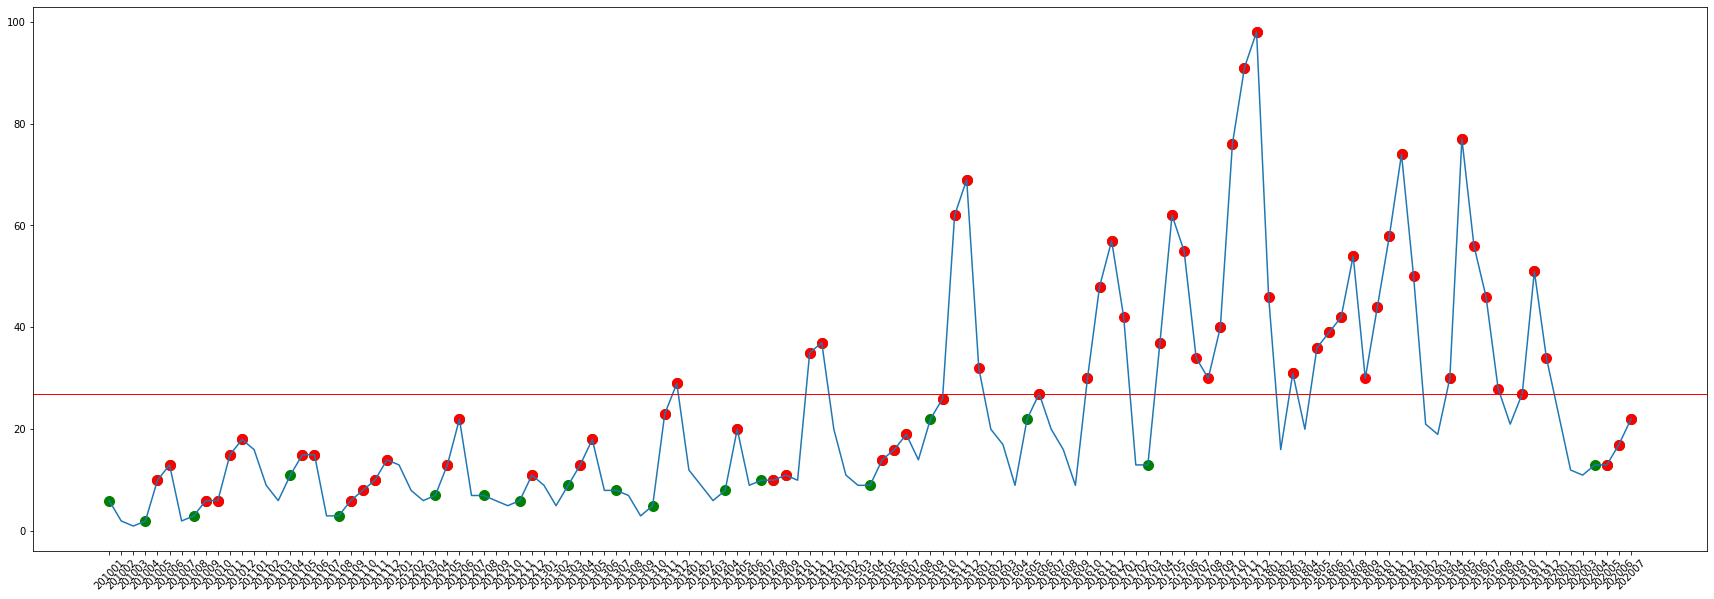

강남구_카바페넴내성장내세균속균종(CRE) 감염증 조심!


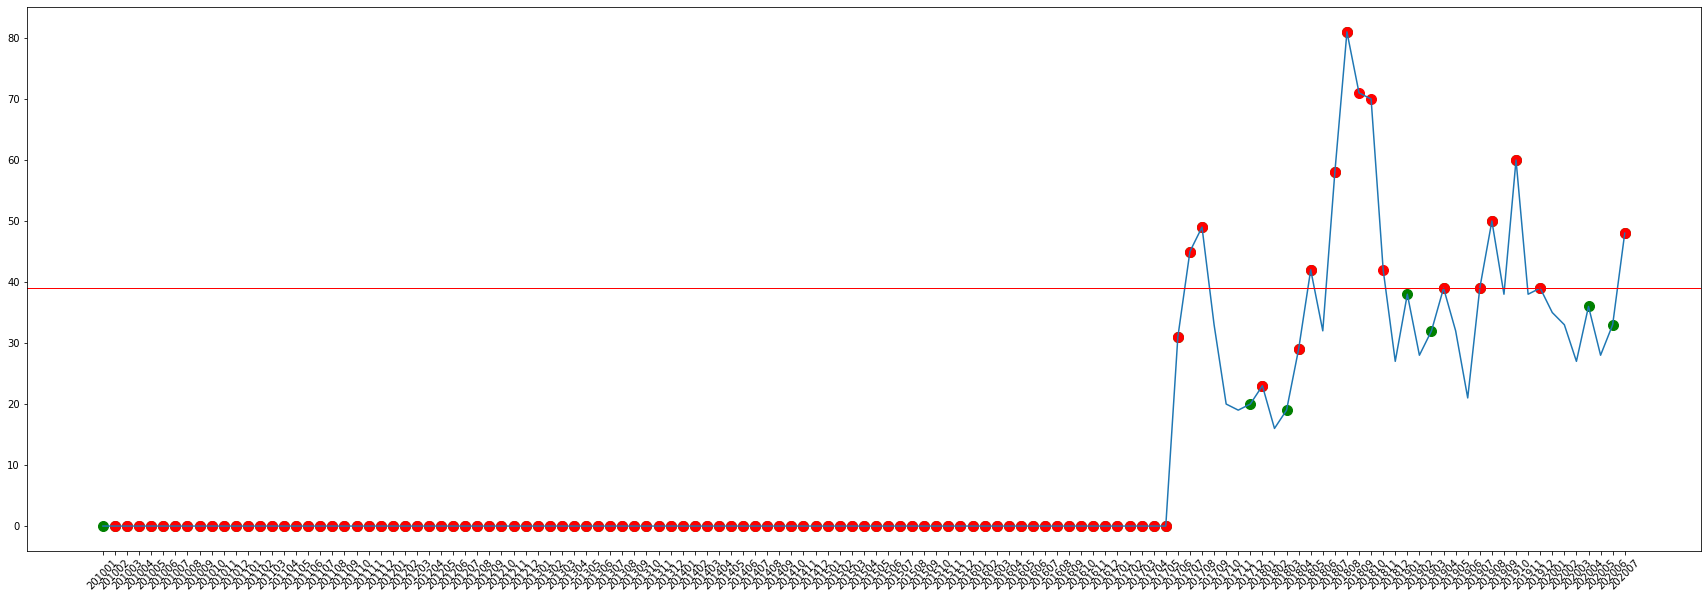

In [ ]:
test_caution.personal_caution()

노원구_A형간염 조심!


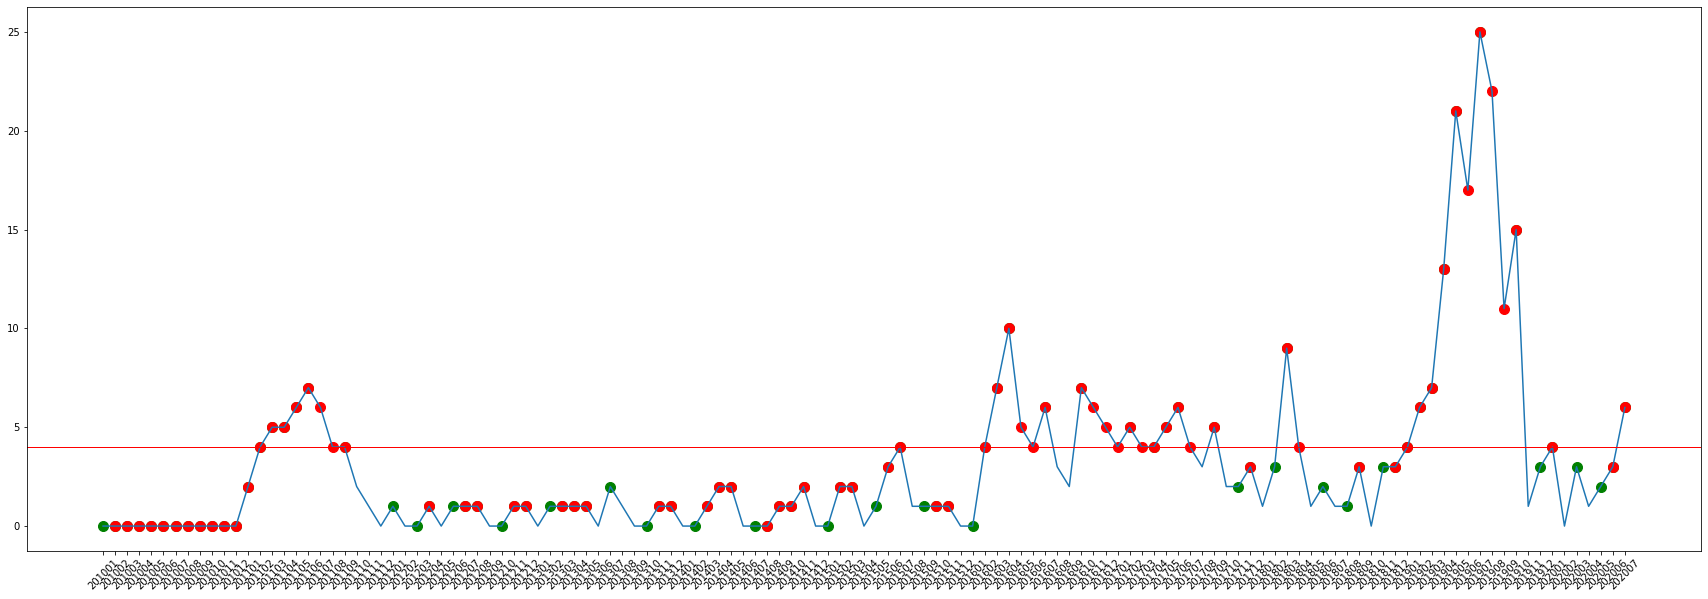

[[0, 2.0, '용산구'], [0, 18.0, '금천구'], [0, 19.0, '도봉구'], [0, 27.0, '성동구'], [0, 33.0, '서초구'], [0, 37.0, '중랑구'], [1, 16.0, '중구'], [1, 27.0, '강북구'], [1, 27.0, '동작구'], [1, 27.0, '마포구'], [1, 32.0, '관악구'], [1, 37.0, '종로구'], [1, 45.0, '양천구'], [1, 48.0, '성북구'], [1, 58.0, '영등포구'], [1, 78.0, '강동구'], [1, 87.0, '서대문구'], [2, 41.0, '광진구'], [2, 69.0, '은평구'], [2, 75.0, '송파구'], [2, 92.0, '구로구'], [3, 47.0, '강서구'], [4, 53.0, '동대문구'], [7, 1128.0, '서울']]
위험 감염병 수 : 0 감염 환자 수 : 2.0 => 용산구로 가시길 추천합니다.


In [ ]:
test_caution.destination_caution('서울','노원구')

In [ ]:
test_caution.destination_caution('서울','용산구')

용산구는 위험이 적습니다.


동대문구_수두 조심!


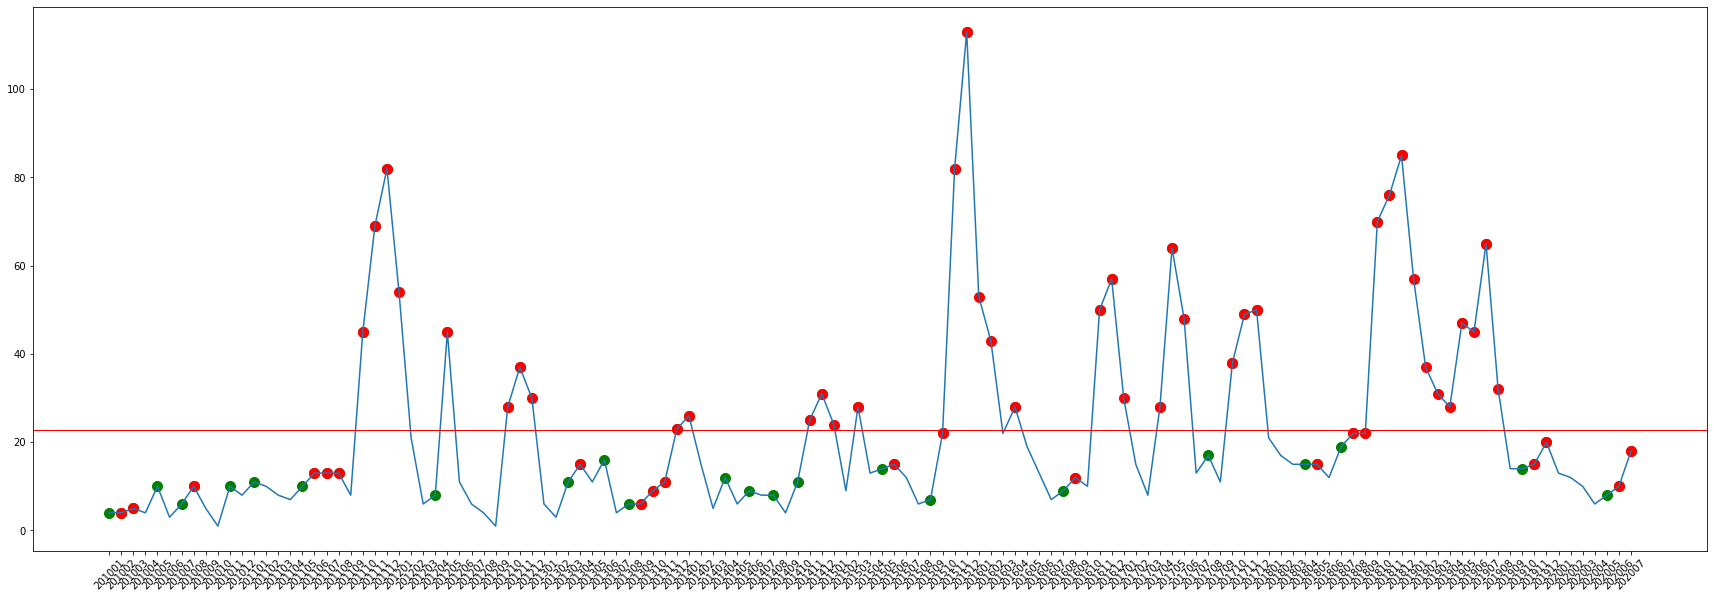

동대문구_A형간염 조심!


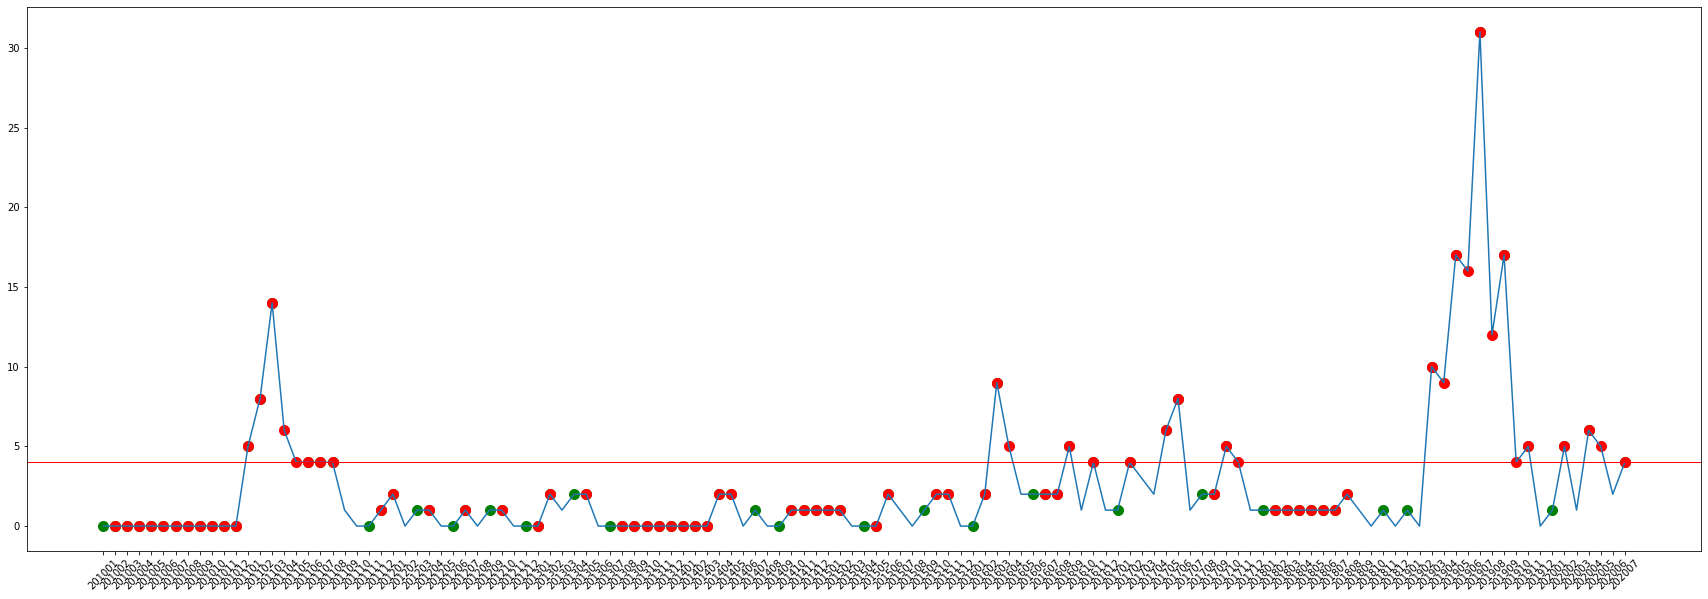

동대문구_카바페넴내성장내세균속균종(CRE) 감염증 조심!


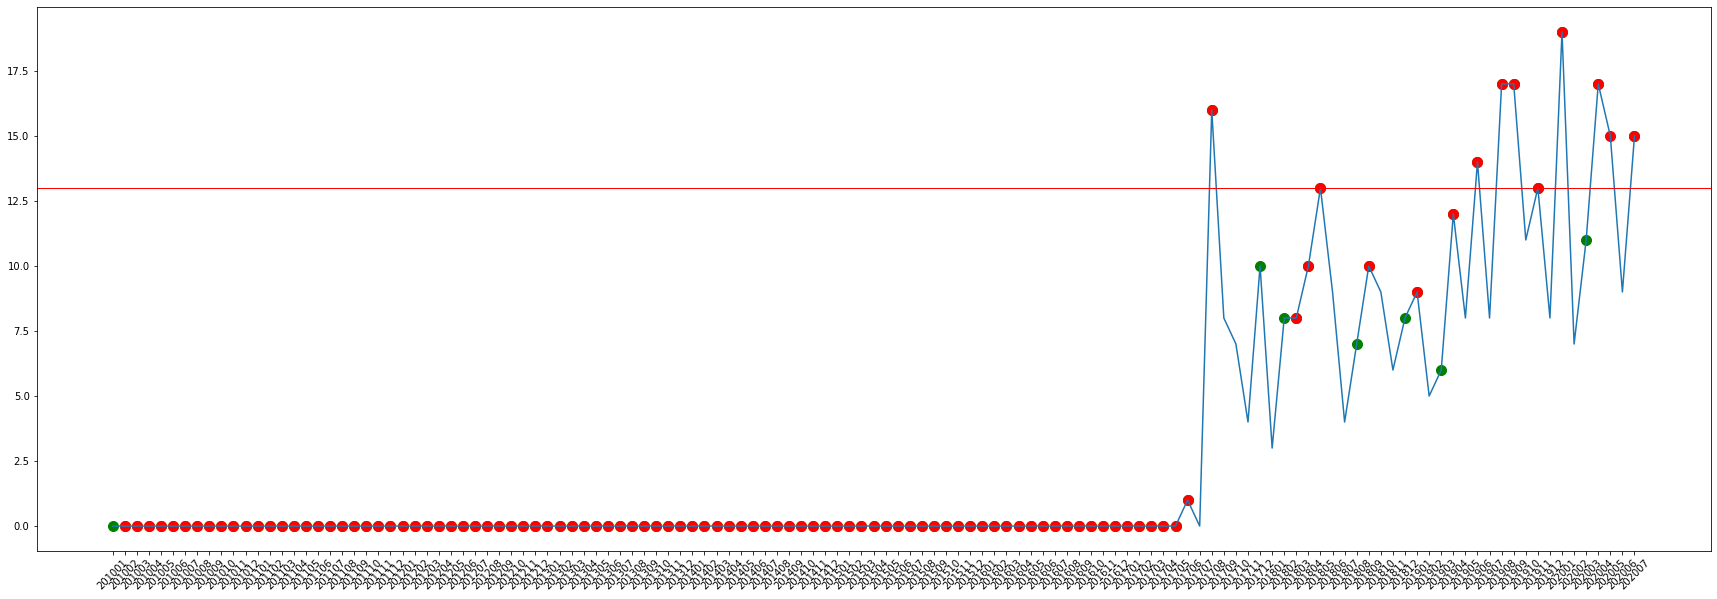

동대문구_C형간염 조심!


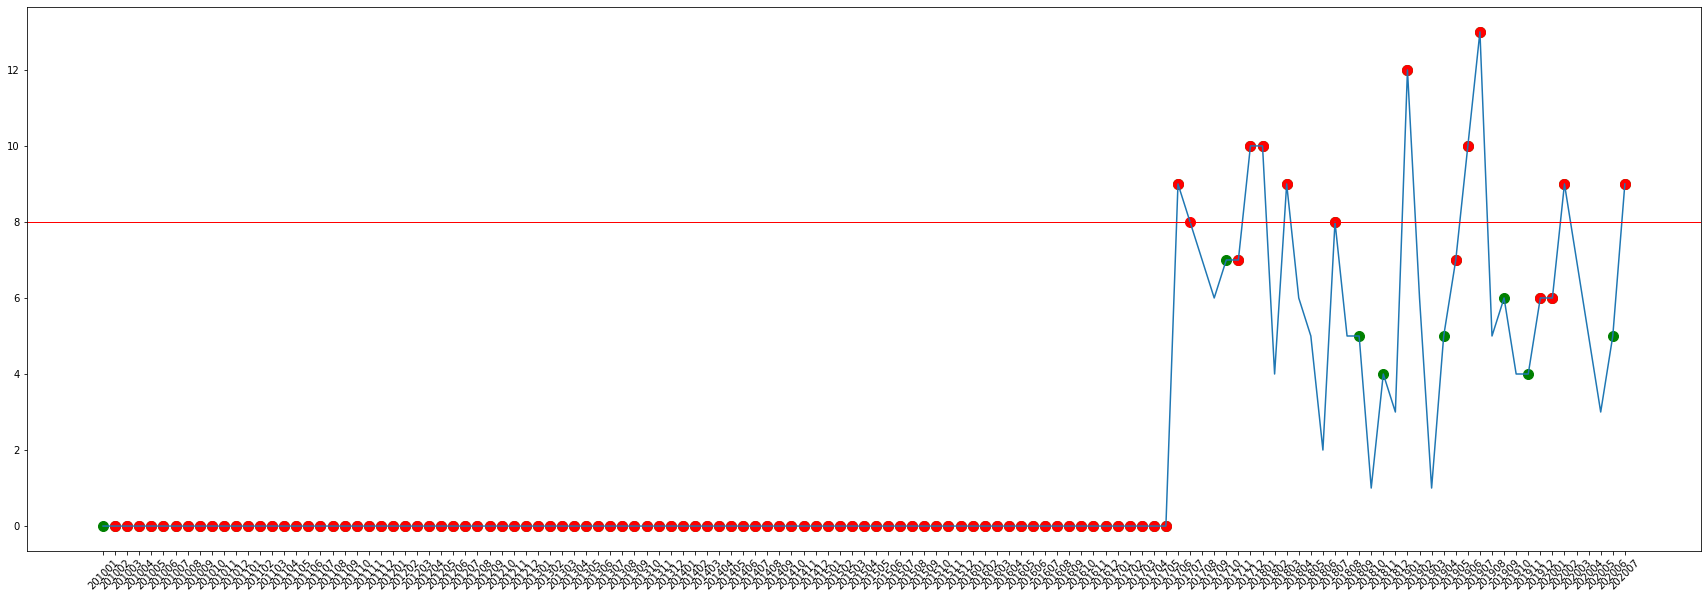

[[0, 2.0, '용산구'], [0, 18.0, '금천구'], [0, 19.0, '도봉구'], [0, 27.0, '성동구'], [0, 33.0, '서초구'], [0, 37.0, '중랑구'], [1, 16.0, '중구'], [1, 27.0, '강북구'], [1, 27.0, '동작구'], [1, 27.0, '마포구'], [1, 32.0, '관악구'], [1, 37.0, '종로구'], [1, 39.0, '노원구'], [1, 45.0, '양천구'], [1, 48.0, '성북구'], [1, 58.0, '영등포구'], [1, 78.0, '강동구'], [1, 87.0, '서대문구'], [2, 41.0, '광진구'], [2, 69.0, '은평구'], [2, 75.0, '송파구'], [2, 92.0, '구로구'], [3, 47.0, '강서구'], [7, 1128.0, '서울']]
위험 감염병 수 : 0 감염 환자 수 : 2.0 => 용산구로 가시길 추천합니다.


In [ ]:
test_caution.destination_caution('서울','동대문구')